In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path= r'C:\Users\evras\Desktop\Data Analysis\Immersion\A4 Python\Instacart Basket Analysis\02 Data'

In [3]:
Vpath= r'C:\Users\evras\Desktop\Data Analysis\Immersion\A4 Python\Instacart Basket Analysis\04 Analysis\Viz'

In [4]:
df=pd.read_pickle(os.path.join(path,'Preped Data','Ords_Prods_Cust_Final.pkl'))

In [5]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,department_id,prices,price_range,...,mean_price,spending_flag,user_region,max_order,user_sobriety,user_parent_status,user_diet,user_pets,user_income_level,user_age_group
0,2539329,1,1,2,8,0.0,196,7,9.0,mid-range product,...,6.367797,low spender,Region 3,10,Not Sober,Parent,Not Vegitarian,No Pets,Low Income,Adult
1,2398795,1,2,3,7,15.0,196,7,9.0,mid-range product,...,6.367797,low spender,Region 3,10,Not Sober,Parent,Not Vegitarian,No Pets,Low Income,Adult
2,473747,1,3,3,12,21.0,196,7,9.0,mid-range product,...,6.367797,low spender,Region 3,10,Not Sober,Parent,Not Vegitarian,No Pets,Low Income,Adult
3,2254736,1,4,4,7,29.0,196,7,9.0,mid-range product,...,6.367797,low spender,Region 3,10,Not Sober,Parent,Not Vegitarian,No Pets,Low Income,Adult
4,431534,1,5,4,15,28.0,196,7,9.0,mid-range product,...,6.367797,low spender,Region 3,10,Not Sober,Parent,Not Vegitarian,No Pets,Low Income,Adult


In [6]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'department_id', 'prices', 'price_range', 'busiest_days',
       'busiest_period_of_day', 'user_state', 'user_age', 'date_joined',
       'user_dependants', 'user_fam_status', 'user_income', 'mean_price',
       'spending_flag', 'user_region', 'max_order', 'user_sobriety',
       'user_parent_status', 'user_diet', 'user_pets', 'user_income_level',
       'user_age_group'],
      dtype='object')

In [7]:
df['max_order'].value_counts()

99    1171076
8      811706
6      811237
9      810057
7      803838
       ...   
97      44949
98      44585
96      40449
2           6
1           5
Name: max_order, Length: 99, dtype: int64

In [8]:
df.loc[df['max_order']>40,'user_loyalty']="Loyal"
df.loc[(df['max_order']<=40)&(df['max_order']>10),'user_loyalty']='Regular'
df.loc[df['max_order']<=10, 'user_loyalty']='New'

In [9]:
df['user_loyalty'].value_counts()

Regular    15874128
Loyal      10282763
New         6242841
Name: user_loyalty, dtype: int64

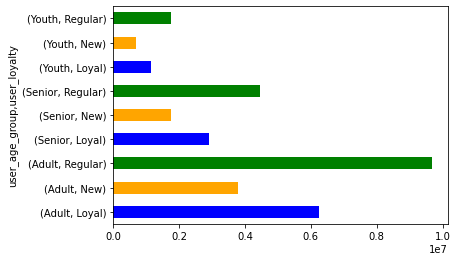

In [32]:
Age_loyalty_hbar=df.groupby('user_age_group')['user_loyalty'].value_counts().sort_index().plot.barh(color=['blue','orange','green'])

In [34]:
Age_loyalty_hbar.figure.savefig(os.path.join(Vpath,'Age and loyalty bar.png'),bbox_inches='tight')

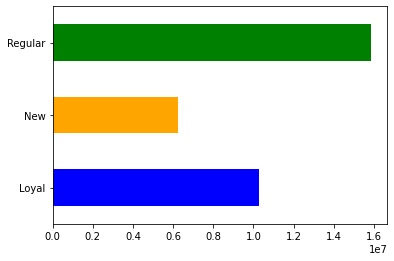

In [26]:
loyalty_bar=df['user_loyalty'].value_counts().sort_index().plot.barh(color=['blue','orange','green'])

In [35]:
loyalty_bar.figure.savefig(os.path.join(Vpath,'loyalty bar.png'),bbox_inches='tight')

In [39]:
df['user_fam_status'].value_counts()

married                             22753055
single                               5324920
divorced/widowed                     2771355
living with parents and siblings     1550402
Name: user_fam_status, dtype: int64

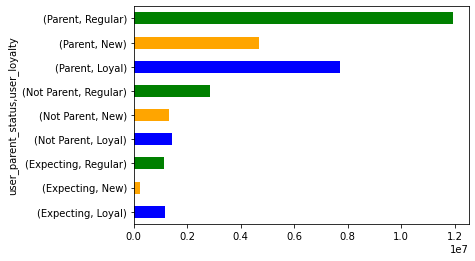

In [41]:
Fam_loyalty_hbar=df.groupby('user_parent_status')['user_loyalty'].value_counts().sort_index().plot.barh(color=['blue','orange','green'])

In [43]:
Fam_loyalty_hbar.figure.savefig(os.path.join(Vpath,'FamilyLoyalty.png'),bbox_inches='tight')

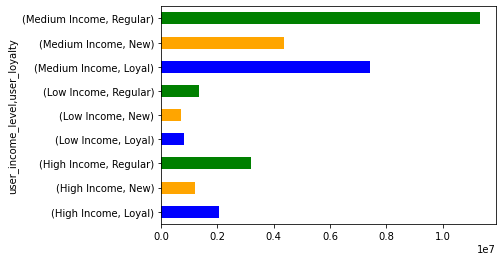

In [44]:
Inc_loyalty_hbar=df.groupby('user_income_level')['user_loyalty'].value_counts().sort_index().plot.barh(color=['blue','orange','green'])

In [45]:
Inc_loyalty_hbar.figure.savefig(os.path.join(Vpath,'IncomeLoyalty.png'),bbox_inches='tight')